# The Sparks Foundation

# Data Science & Business Analytics Intern

## Task1:Prediction using Supervised ML

# Chetan Kumar

### Importing the libraries

In [5]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error 

### Importing Data

In [7]:
url="http://bit.ly/w-data"
data_train=pd.read_csv(url)

### Analysis of data and Visualization

In [8]:
print('rows   :',data_train.shape[0])
print('columns:',data_train.shape[1])

rows   : 25
columns: 2


In [9]:
data_train.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data_train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


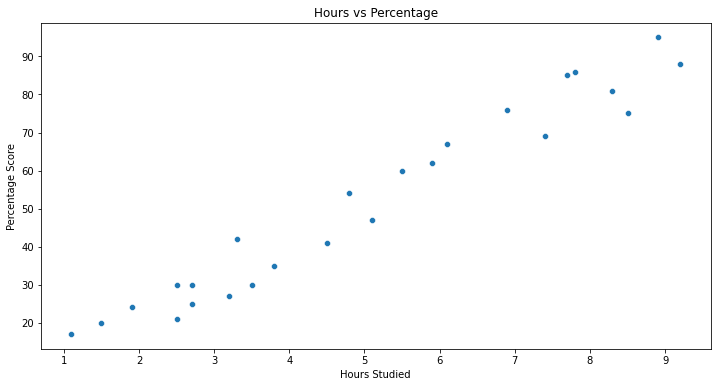

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data_train['Hours'],data_train['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


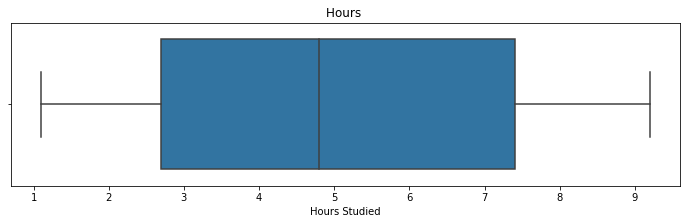

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


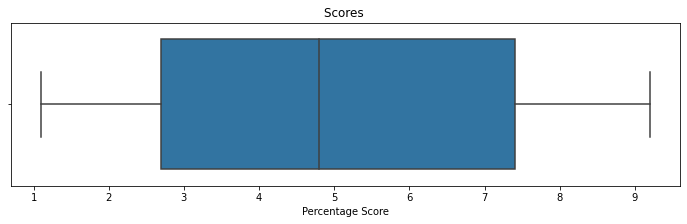

In [13]:
plt.figure(figsize=(12,3))
sns.boxplot(data_train['Hours'])
plt.title('Hours ')  
plt.xlabel('Hours Studied')  
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data_train['Hours'])
plt.title('Scores ')  
plt.xlabel('Percentage Score')  
plt.show()

<AxesSubplot:ylabel='Density'>

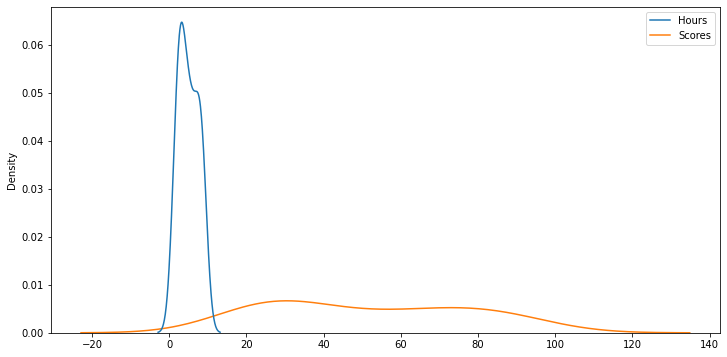

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data_train)  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


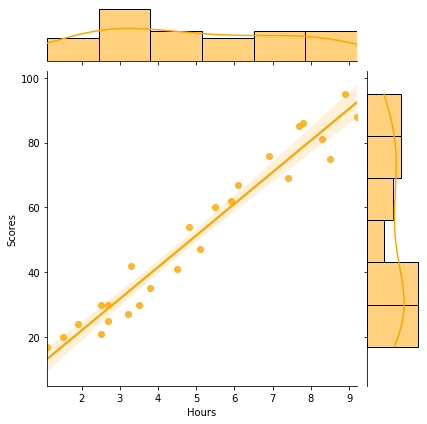

In [15]:
sns.jointplot("Hours", "Scores", data_train, kind='reg',color='#FFA500');

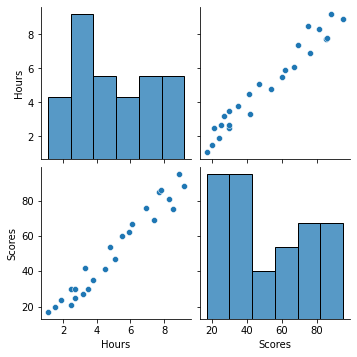

In [16]:
sns.pairplot(data_train)

### Spliting data

In [17]:
X=data_train.drop('Scores',axis=1)
y=data_train['Scores']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [19]:
print('X_train\n',X_train)

X_train
     Hours
3     8.5
19    7.4
7     5.5
10    7.7
2     3.2
17    1.9
21    4.8
24    7.8
18    6.1
5     1.5
6     9.2
4     3.5
1     5.1
13    3.3
11    5.9
0     2.5
16    2.5


In [20]:
print('y_train\n',y_train)

y_train
 3     75
19    69
7     60
10    85
2     27
17    24
21    54
24    86
18    67
5     20
6     88
4     30
1     47
13    42
11    62
0     21
16    30
Name: Scores, dtype: int64


In [21]:
print('X_test\n',X_test)

X_test
     Hours
15    8.9
20    2.7
23    6.9
22    3.8
14    1.1
12    4.5
8     8.3
9     2.7


In [22]:
print('y_test\n',y_test)

y_test
 15    95
20    30
23    76
22    35
14    17
12    41
8     81
9     25
Name: Scores, dtype: int64


In [23]:
print('Rows of Train Data:',X_train.shape[0])
print('Rows of Test Data:',X_test.shape[0])

Rows of Train Data: 17
Rows of Test Data: 8


### Training the data

In [24]:
LR=LinearRegression()

In [25]:
LR.fit(X_train,y_train)

LinearRegression()

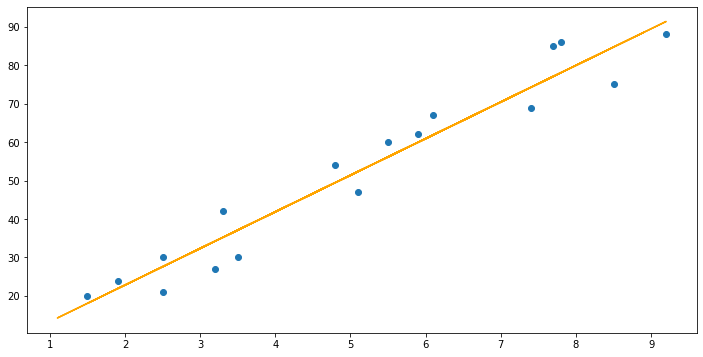

In [26]:
LinearLine = LR.coef_ * X + LR.intercept_

plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X, LinearLine,color='#FFA500')
plt.show()

### Making Prediction

In [27]:
y_predict=LR.predict(X_test)
comp_data=pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
comp_data

,Actual,Predicted
15,95,88.526602
20,30,29.492644
23,76,69.483390
22,35,39.966411
14,17,14.258075
12,41,46.631535
8,81,82.813638
9,25,29.492644


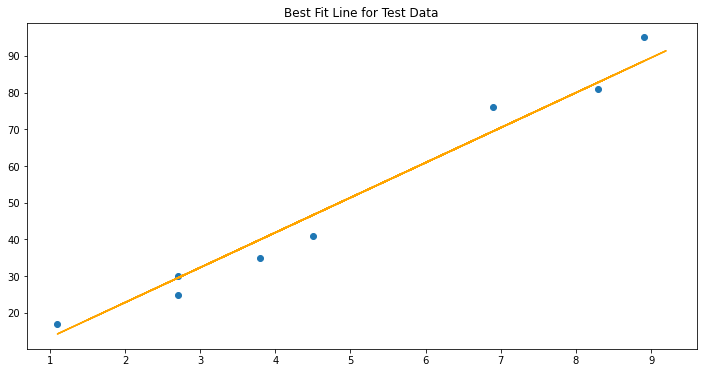

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test)
plt.plot(X,LinearLine,color='#FFA500')
plt.title("Best Fit Line for Test Data")
plt.show()

### Evaluating Scores

In [29]:
print("Accuracy of Training learning rate -",LR.score(X_train, y_train)*100)
print("Accuracy of Testing learning rate - ",LR.score(X_test, y_test)*100)

Accuracy of Training learning rate - 93.93866419807256
Accuracy of Testing learning rate -  97.17199573955199


In [30]:
print('MSE                :',mean_squared_error(y_test,y_predict))
print('RMSE               :',sqrt(mean_squared_error(y_test,y_predict)))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_predict))

MSE                : 21.499902390056064
RMSE               : 4.636798722184959
Mean Absolute Error: 4.142939772140697


### By checking the Train and Test Graph we can say that he or she has to study more than 8hrs to get above 80%
#### Lets check with our own random numbers

In [31]:
y_expect=LR.predict([[8]])
y_expect

array([79.95715655])